# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

# Null Hypothesis and Alternate hypothesis
People who have high credit history, income, education level and properties in urban areas will more likely to get a loan.
and the opposite of this is true for alternate hypothesis.

## 2 & 3. Data Cleaning and Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv("/Users/kamininayyar/Downloads/data.csv") 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2]:
df.shape

(614, 13)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [5]:
miss_val = df.isnull().sum().sort_values(ascending=False)
percent_miss_val = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
df_miss_val = pd.concat([miss_val,percent_miss_val], axis=1, keys=['Total_null','Percentage_null'])
df_miss_val                                                                

,Total_null,Percentage_null
Credit_History,50,0.081433
Self_Employed,32,0.052117
LoanAmount,22,0.035831
Dependents,15,0.024430
Loan_Amount_Term,14,0.022801
Gender,13,0.021173
Married,3,0.004886
Loan_ID,0,0.000000
Education,0,0.000000
ApplicantIncome,0,0.000000


In [6]:
# out of 614 entries the most null values are in the credit_history column followed by self_employed and then loan_amount

In [7]:
# let's fill values
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].dropna().mode().values[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].dropna().mode().values[0])
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].dropna().median())
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].dropna().mode().values[0])
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].dropna().mode().values[0])
df['Gender'] = df['Gender'].fillna(df['Gender'].dropna().mode().values[0])
df['Married'] = df['Married'].fillna(df['Married'].dropna().mode().values[0])
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [8]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)
2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?
3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.



Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [9]:
df.Credit_History.value_counts()

1.0    525
0.0     89
Name: Credit_History, dtype: int64

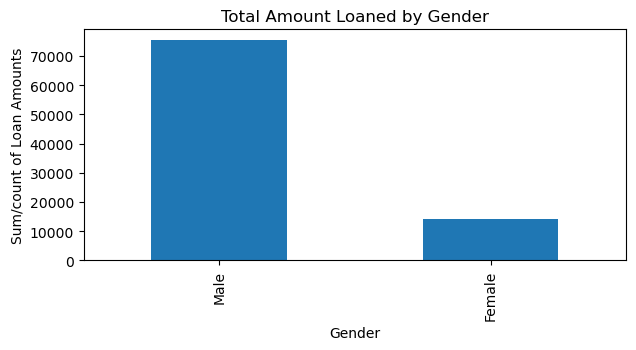

In [10]:
plt.figure(figsize=(7, 3))
df.groupby('Gender').LoanAmount.sum().sort_values(ascending=False).plot.bar() #count()
plt.title('Total Amount Loaned by Gender', fontsize=12)
plt.xlabel('Gender', fontsize=10)
plt.ylabel('Sum/count of Loan Amounts', fontsize=10)
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=8)
plt.show()



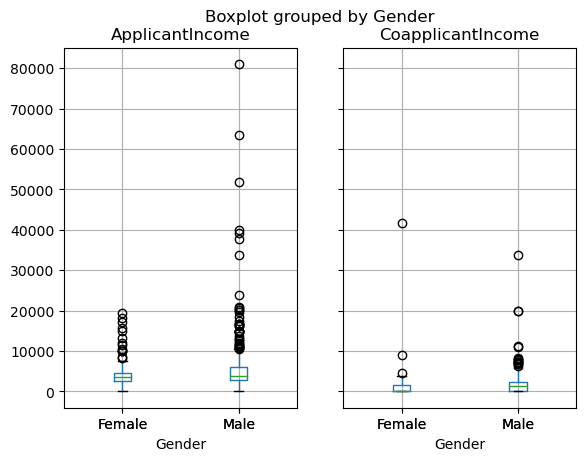

In [11]:
#2
boxplot = df.boxplot(column=['ApplicantIncome', 'CoapplicantIncome'], by='Gender', fontsize=10)

In [12]:

df1 = df.loc[df['ApplicantIncome']<50000]
df1.shape

(611, 13)

In [13]:
df1 = df1.loc[df1['CoapplicantIncome']<20000]
df1.shape

(607, 13)

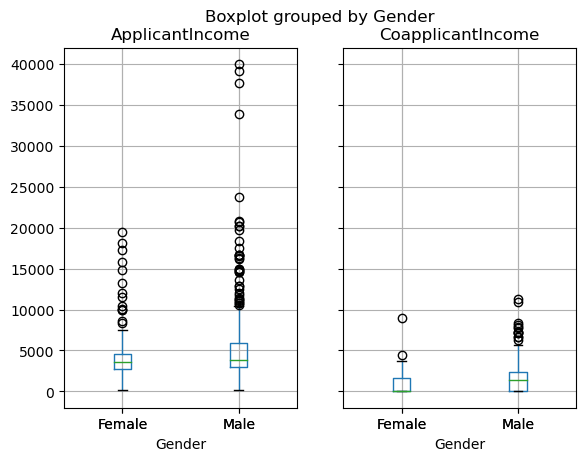

In [14]:
boxplot = df1.boxplot(column=['ApplicantIncome', 'CoapplicantIncome'], by='Gender', fontsize=10)

### Distribution analysis

<AxesSubplot:xlabel='Gender'>

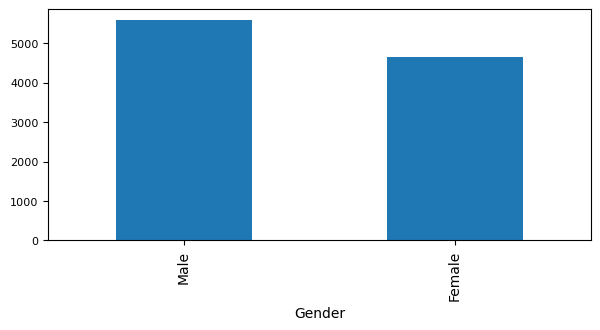

In [15]:
plt.figure(figsize=(7, 3))
df.groupby('Gender').ApplicantIncome.mean().sort_values(ascending=False).plot.bar() #count()

<AxesSubplot:xlabel='Married'>

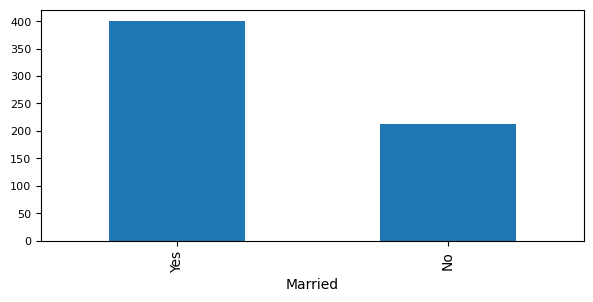

In [16]:
plt.figure(figsize=(7, 3))
df.groupby('Married').ApplicantIncome.count().sort_values(ascending=False).plot.bar()

<AxesSubplot:xlabel='Married'>

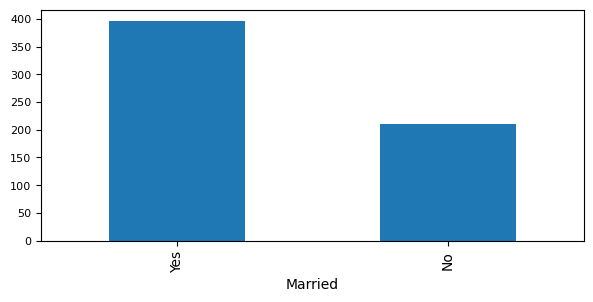

In [17]:
plt.figure(figsize=(7, 3))

df1.groupby('Married').ApplicantIncome.count().sort_values(ascending=False).plot.bar()


<AxesSubplot:xlabel='Education'>

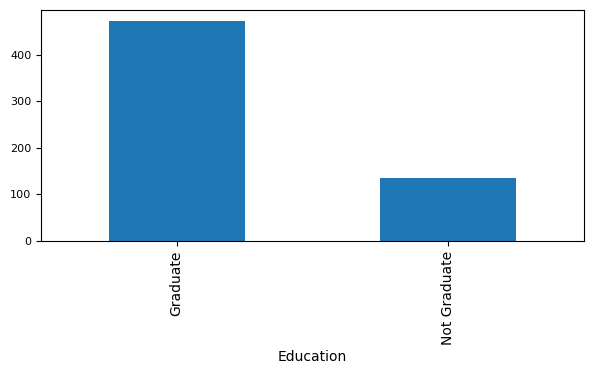

In [18]:
plt.figure(figsize=(7, 3))
df1.groupby('Education').ApplicantIncome.count().sort_values(ascending=False).plot.bar()


Look at box plots to understand the distributions. 

Look at the distribution of income segregated  by `Education`

<AxesSubplot:xlabel='Education'>

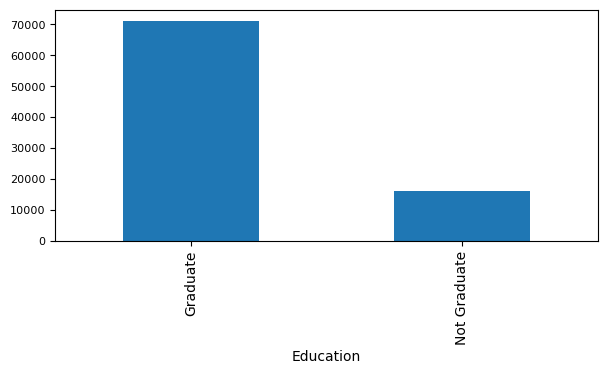

In [19]:
plt.figure(figsize=(7, 3))
df1.groupby('Education').LoanAmount.sum().sort_values(ascending=False).plot.bar()

Look at the boxplot of LoanAmount

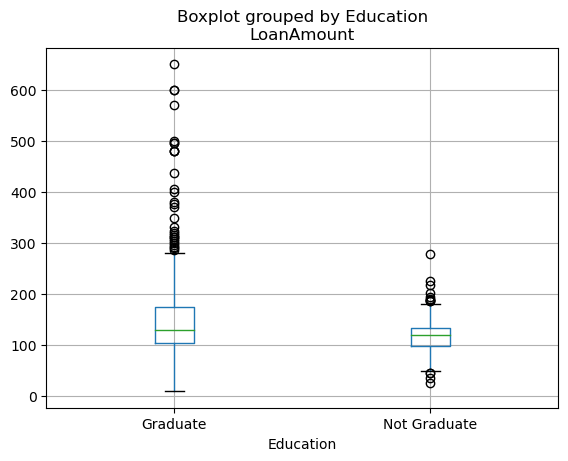

In [20]:
boxplot = df1.boxplot(column=['LoanAmount'], by='Education', fontsize=10)

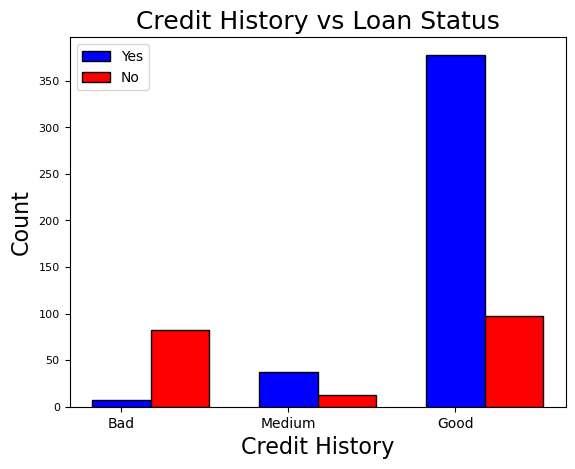

In [21]:
#Relationship between Credit History and Loan Status: 

Credit_History=['Bad','Medium','Good']
Loan_Status=['Yes', 'No']
pos=np.arange(len(Credit_History))
bar_width=0.35
Loan_Status_Yes=[7,37,378]
Loan_Status_NO=[82,13,97]

plt.bar(pos,Loan_Status_Yes,bar_width,color='blue',edgecolor='black')
plt.bar(pos+bar_width,Loan_Status_NO,bar_width,color='red',edgecolor='black')
plt.xticks(pos, Credit_History)
plt.xlabel('Credit History', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.title('Credit History vs Loan Status',fontsize=18)
plt.legend(Loan_Status,loc=2)
plt.show()

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

In [22]:
df2 = df1.pivot_table( index='ApplicantIncome')
df2.head()

,CoapplicantIncome,Credit_History,LoanAmount,Loan_Amount_Term
ApplicantIncome,,,,
150,1800.0,1.0,135.0,360.0
210,2917.0,1.0,98.0,360.0
645,3683.0,1.0,113.0,480.0
674,5296.0,1.0,168.0,360.0
1000,3022.0,1.0,110.0,360.0


In [23]:

# print out column with unique values
for col in df1.columns:
    if df1[col].dtypes == 'object':
        num_of_unique_cat = len (df1[col].unique())
        print("Features '{col_name}' has '{unique_cat}' unique categories". format(col_name=col, unique_cat=num_of_unique_cat))

Features 'Loan_ID' has '607' unique categories
Features 'Gender' has '2' unique categories
Features 'Married' has '2' unique categories
Features 'Dependents' has '4' unique categories
Features 'Education' has '2' unique categories
Features 'Self_Employed' has '2' unique categories
Features 'Property_Area' has '3' unique categories
Features 'Loan_Status' has '2' unique categories


In [24]:
df1 = df1.drop(['Loan_ID','Dependents'], axis = 1)

In [25]:
df1['Self_Employed'].replace({'Yes':1,'No':0},inplace=True)
df1['Married'].replace({'Yes':1,'No':0},inplace=True)
df1['Gender'].replace({'Male':1,'Female':0},inplace=True)
df1['Education'].replace({'Graduate':1,'Not Graduate':0},inplace=True)
df1['Property_Area'].replace({'Urban':2,'Semiurban':1,'Rural':0},inplace=True)
df1['Loan_Status'].replace({'Y':1,'N':0},inplace=True)

In [26]:
df1.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,1,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,1,0,6000,0.0,141.0,360.0,1.0,2,1


In [27]:
df1.Loan_Amount_Term.value_counts()

360.0    522
180.0     42
480.0     15
300.0     12
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

## 4. Building a Predictive Model

<AxesSubplot:>

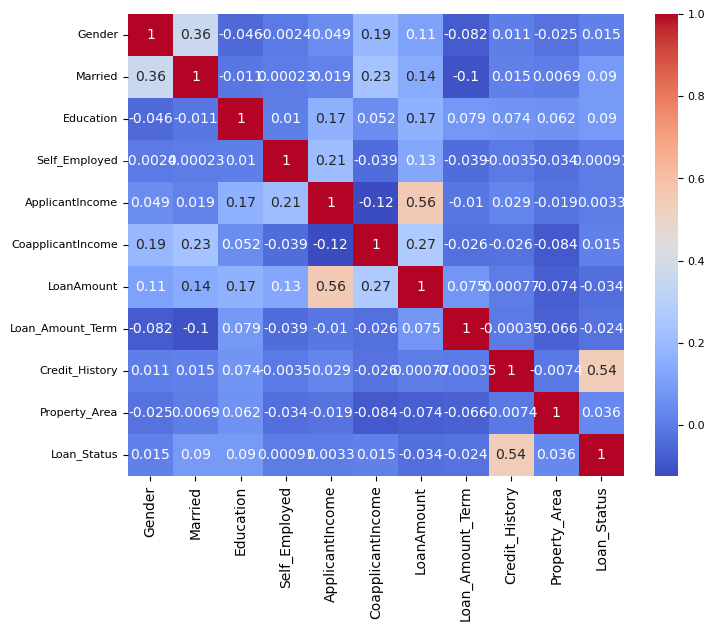

In [28]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm')

In [29]:
y = df1['Loan_Status']
X = df1.drop('Loan_Status', axis = 1)

In [30]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_scaled = pd.DataFrame(sc_X.fit_transform(X), columns=X.columns)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [32]:
model = LogisticRegression()

In [33]:
model.fit(X_train,y_train)

LogisticRegression()

In [34]:
ypred=model.predict(X_test)
print(ypred)

[1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 0 1 1 1 1 1 1 1]


In [35]:
evaluation = f1_score(y_test, ypred)
evaluation

0.888888888888889

Try paramater grid search to improve the results

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import FeatureUnion
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline, make_pipeline

In [37]:
feature_union = FeatureUnion([('pca', PCA()), 
                              ('select_best', SelectKBest())])

pipeline = Pipeline(steps=[('scaling', StandardScaler()),
                           ('features', feature_union),
                           ('classifier', RidgeClassifier())])

# Find the best hyperparameters using GridSearchCV on the train set
param_grid = {'classifier__alpha': [0.001, 0.01, 0.1], 
              'features__pca__n_components': [3, 5],
              'features__select_best__k': [1, 3, 6]}

grid = GridSearchCV(pipeline, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)

best_model = grid.best_estimator_
best_hyperparams = grid.best_params_
best_acc = grid.score(X_test, y_test)
print(f'Best test set accuracy:\n\t {best_acc}\nAchieved with hyperparameters:\n\t {best_hyperparams}')

Best test set accuracy:
	 0.8278688524590164
Achieved with hyperparameters:
	 {'classifier__alpha': 0.001, 'features__pca__n_components': 3, 'features__select_best__k': 1}


## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
#used for estimating model accuracy and getting reports
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [39]:
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N


In [40]:
#separate target from predictors and encode target with LabelEncoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
X =df.drop(['Loan_ID','Loan_Status'], axis=1) # drop the column not required

y = LabelEncoder().fit_transform(df.Loan_Status)

#train-test split
train_X, valid_X, train_y, valid_y = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [41]:
#get num and cat columns for the preprocessor (cells below)
num_cols = [col for col in train_X.columns if train_X[col].dtype in ['int64', 'float64']]
cat_cols = [col for col in train_X.columns if train_X[col].dtype=='object']

In [42]:
# create pipeline

num_transform = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

cat_transform = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

#the preprocessor is a column transformer that performs the adquate transofrmations 
#depending on the column type (numerical or categorical)
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transform, num_cols),
    ('cat', cat_transform, cat_cols)
])


df_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression(max_iter=800))
])

In [43]:
df_pipeline.fit(train_X, train_y)
preds = df_pipeline.predict(valid_X)
print(accuracy_score(valid_y, preds))
print(classification_report(valid_y, preds))

0.8373983739837398
              precision    recall  f1-score   support

           0       0.88      0.45      0.60        33
           1       0.83      0.98      0.90        90

    accuracy                           0.84       123
   macro avg       0.86      0.72      0.75       123
weighted avg       0.84      0.84      0.82       123



In [52]:
valid_X.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 123 entries, 454 to 303
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             123 non-null    object 
 1   Married            123 non-null    object 
 2   Dependents         123 non-null    object 
 3   Education          123 non-null    object 
 4   Self_Employed      123 non-null    object 
 5   ApplicantIncome    123 non-null    int64  
 6   CoapplicantIncome  123 non-null    float64
 7   LoanAmount         123 non-null    float64
 8   Loan_Amount_Term   123 non-null    float64
 9   Credit_History     123 non-null    float64
 10  Property_Area      123 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 11.5+ KB


In [44]:
score = cross_val_score(df_pipeline, df, y, cv=7, scoring='accuracy')
print('The mean of the scores of 7-fold cross validation is ', score.mean())

The mean of the scores of 7-fold cross validation is  0.8078817733990148


In [45]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [51]:
# saving the model
import pickle

# saving the columns
model_columns = list(valid_X.columns)
with open('model_columns.pkl','wb') as file:
    pickle.dump(model_columns, file)
    
    
pickle.dump(df_pipeline, open('df_pipeline.pkl', 'wb'))

In [47]:
model

LogisticRegression()